mor

In [5]:
import pandas as pd
dataset=pd.read_csv('ゼオライト合成データ288.csv', index_col=0, header=0)
x=dataset.iloc[:, 0:6]
y_mor=dataset.iloc[:, 7]
autoscaled_x = (x - x.mean())/x.std()
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(autoscaled_x)
P = pd.DataFrame(pca.components_.T)
P.index=x.columns
P.columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']
P

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
Al2O3/Si,0.552611,-0.005659,0.006963,-0.133911,0.807897,-0.154633
H2O/Si,0.546208,0.011839,-0.318657,0.237343,-0.444098,-0.588574
NaOH/Si,0.141010,0.709336,-0.120266,0.559457,0.074890,0.379335
KOH/Si,0.525923,-0.347017,-0.163823,-0.165269,-0.255019,0.695556
temperature,-0.199272,-0.592484,-0.290087,0.677142,0.254750,0.041051
time,0.245133,-0.158785,0.879179,0.356244,-0.120581,-0.017061


In [2]:
P.iloc[:, 0]

Al2O3/Si       0.552611
H2O/Si         0.546208
NaOH/Si        0.141010
KOH/Si         0.525923
temperature   -0.199272
time           0.245133
Name: PCA1, dtype: float64

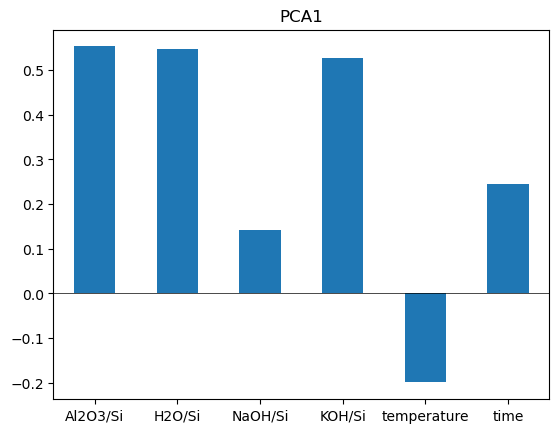

In [6]:
import matplotlib.pyplot as plt
P.iloc[:, 0].plot(kind='bar', rot=0)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('PCA1')
plt.show()

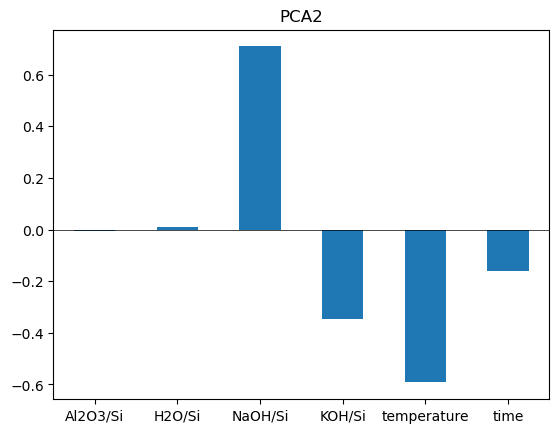

In [7]:
P.iloc[:, 1].plot(kind='bar', rot=0)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('PCA2')
plt.show()

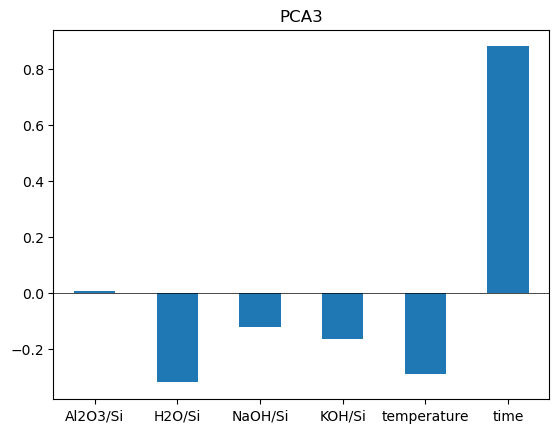

In [8]:
P.iloc[:, 2].plot(kind='bar', rot=0)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('PCA3')
plt.show()

In [9]:
寄与率=pd.DataFrame(pca.explained_variance_ratio_)
寄与率.columns=['寄与率']
寄与率

,寄与率
0,0.424181
1,0.233745
2,0.155686
3,0.111647
4,0.053001
5,0.021740


In [10]:
import matplotlib.pyplot as plt


In [11]:
寄与率.cumsum()

,寄与率
0,0.424181
1,0.657926
2,0.813612
3,0.925258
4,0.978260
5,1.000000


In [12]:
T=pd.DataFrame(pca.transform(autoscaled_x))
T.index=x.index
T.columns=P.columns
T

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
sample,,,,,,
試料1,1.244644,1.321879,0.546237,-0.653215,1.140897,-0.300919
試料2,-0.044352,0.883251,0.721479,-0.843631,-0.222444,-0.048946
試料3,1.084928,1.000680,0.285558,-0.027864,1.177395,-0.239830
試料4,-0.235011,0.217391,0.606610,-0.594655,0.166703,-0.062206
試料5,-1.093100,-0.775881,-0.307068,0.256566,0.033416,0.029253
...,...,...,...,...,...,...
試料277,-1.001151,-0.357307,-0.502842,-0.231976,0.099033,0.030424
試料278,0.395652,1.507896,-0.809387,0.231949,-0.523274,-0.285295
試料279,-1.135760,-0.671117,-0.513614,0.089645,0.041282,0.028351


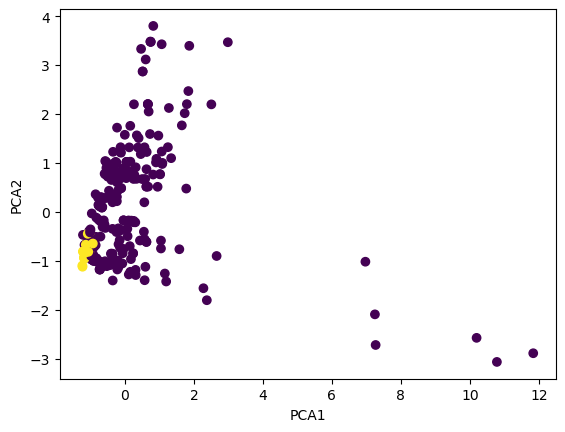

In [15]:
CBU=pd.factorize(y_mor)[0]
import matplotlib.pyplot as plt
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=plt.get_cmap('viridis'))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()            

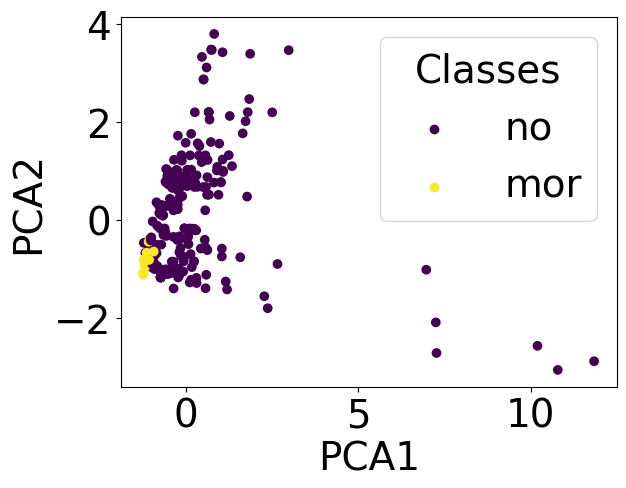

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# クラス名のリスト（Class 0 が "no", Class 1 が "mor" に対応）
class_labels = ['no', 'mor']

# ユニークなカテゴリとその対応する色を取得
unique_classes = np.unique(CBU)
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(unique_classes) - 1)) for i in range(len(unique_classes))]

# 散布図を作成
plt.rcParams['font.size']=28
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=cmap)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 凡例の設定
for i, unique_class in enumerate(unique_classes):
    plt.scatter([], [], color=colors[i], label=class_labels[unique_class])

plt.legend(title='Classes')
plt.show()

d6r

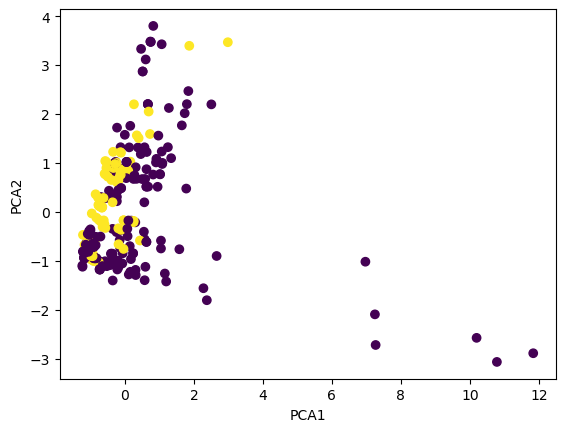

In [14]:
y_d6r=dataset.iloc[:, 8]
CBU=pd.factorize(y_d6r)[0]
import matplotlib.pyplot as plt
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=plt.get_cmap('viridis'))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()            

can

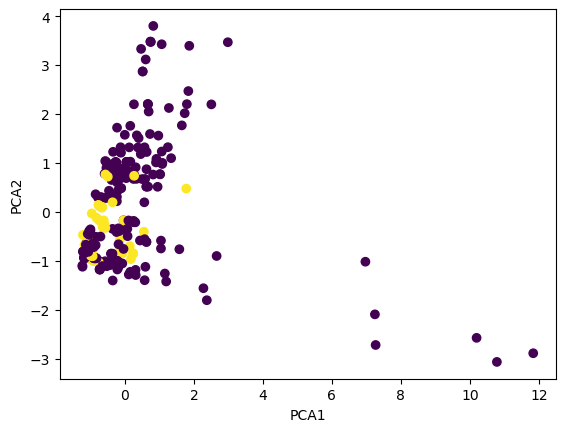

In [9]:
y_can=dataset.iloc[:, 9]
CBU=pd.factorize(y_can)[0]
import matplotlib.pyplot as plt
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=plt.get_cmap('viridis'))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()            

d6r

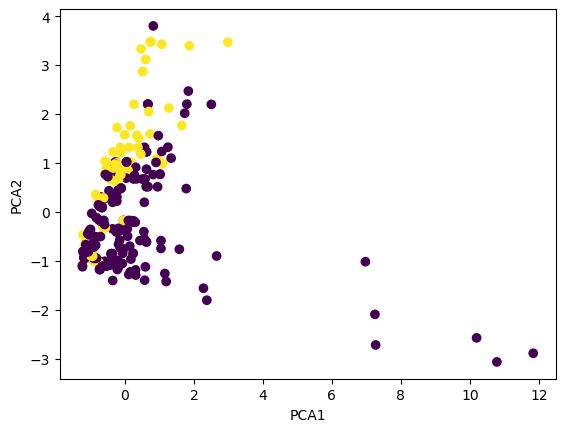

In [37]:
y_sod=dataset.iloc[:, 10]
CBU=pd.factorize(y_sod)[0]
import matplotlib.pyplot as plt
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=plt.get_cmap('viridis'))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()            

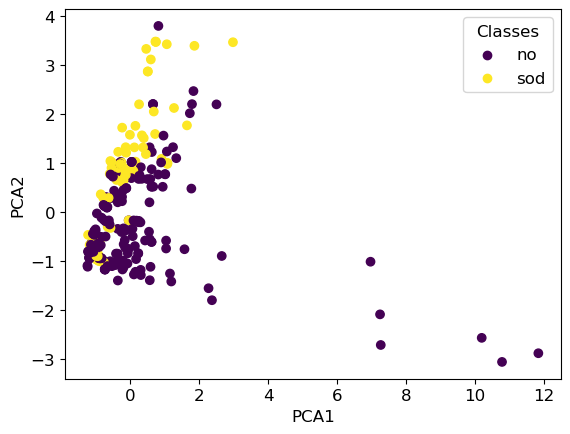

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# クラス名のリスト（Class 0 が "no", Class 1 が "mor" に対応）
class_labels = ['no', 'sod']

# ユニークなカテゴリとその対応する色を取得
unique_classes = np.unique(CBU)
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(unique_classes) - 1)) for i in range(len(unique_classes))]

# 散布図を作成
plt.rcParams['font.size']=12
plt.scatter(T.iloc[:, 0], T.iloc[:, 1], c=CBU, cmap=cmap)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 凡例の設定
for i, unique_class in enumerate(unique_classes):
    plt.scatter([], [], color=colors[i], label=class_labels[unique_class])

plt.legend(title='Classes')
plt.show()